# **Neural Networks: Activation Functions & Convolutional Neural Networks (CNNs)**

Welcome to this tutorial on Neural Networks! We'll cover:

1. Fundamentals of Neural Networks: The basic building blocks.

2. Activation Functions: Key to introducing non-linearity.

3. Building a Simple Dense Neural Network: A practical example for classification.
Introduction to Convolutional Neural Networks (CNNs): Why they are powerful for image data.

4. Key CNN Layers: Convolution and Pooling.

5. Building a Simple CNN: A practical example for image classification.


The code begins by importing essential Python libraries for data manipulation and visualization, such as NumPy, Matplotlib, and Seaborn. It then imports TensorFlow and Keras modules necessary for building neural networks, including layers like Dense, Conv2D, and MaxPooling2D. The MNIST dataset is loaded for image classification tasks, and utility functions like to_categorical are included to prepare the data. Scikit-learn modules are also imported to handle tasks like dataset generation (make_circles), scaling features, and splitting data. Plotting styles are set globally to improve visualization quality. Finally, it prints out the installed versions of TensorFlow and Keras, confirming the environment setup is complete for training neural networks.

In [1]:
# Lets start by importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist # We'll use the MNIST dataset
from tensorflow.keras.utils import to_categorical

# Scikit-learn for some utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles # For a simple dense network example

# Set some global styles for plots
plt.style.use('seaborn-v0_8-whitegrid') # If 'seaborn-v0_8-whitegrid' causes error, try 'seaborn-v0_8-darkgrid' or 'ggplot'
sns.set_context('talk')

print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")

TensorFlow Version: 2.18.0
Keras Version: 3.8.0


# **Fundamentals of Neural Networks**

A Neural Network (NN), often called an Artificial Neural Network (ANN), is a computational model inspired by the structure and function of biological neural networks in the brain.

**Key Components:**
Neurons (Nodes): Basic computational units. Each neuron receives inputs, performs a calculation (weighted sum followed by an activation function), and produces an output.

**Layers: Neurons are organized into layers:**

**Input Layer:** Receives the raw input data (features).

**Hidden Layers:** Perform intermediate computations. A network can have one or more hidden layers. "Deep" learning refers to networks with multiple hidden layers.

**Output Layer:** Produces the final prediction (e.g., class probabilities, a continuous value).

**Weights and Biases:** Each connection between neurons has an associated weight. Weights determine the strength of the connection. Biases are additional parameters that allow shifting the activation function. These are the parameters the network learns during training.
Connections: Signals flow from neurons in one layer to neurons in the next.
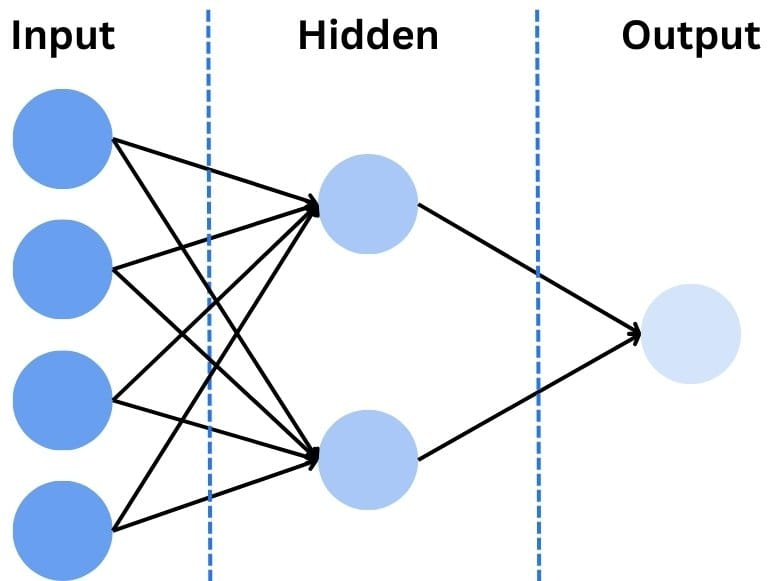

This code sets up a visualization tool to help understand activation functions used in neural networks. It starts with a clear explanation of the purpose of activation functions: they introduce non-linearity into a model, enabling neural networks to learn complex patterns that linear models can't capture, even with multiple layers. Without activation functions, a deep network would collapse into a simple linear function. The helper function plot_activation takes a mathematical function (func) and a name (name) as input, computes its values over a specified range of x values (defaulting from -5 to 5), and then plots the result using Matplotlib. This makes it easier to visualize how different activation functions (like ReLU, Sigmoid, or Tanh) transform input values, which is key to understanding their role in training deep learning models.

In [2]:
'''
Activation functions are crucial components of neural networks.
They decide whether a neuron should be activated or not by calculating a weighted sum and further adding bias to it.
Their primary purpose is to introduce non-linearity into the output of a neuron.
Without non-linearity, a neural network, no matter how many layers it has, would behave like a single-layer perceptron (a linear model).
'''
# Helper function to plot activation functions
def plot_activation(func, name, x_range=(-5, 5)):
    x = np.linspace(x_range[0], x_range[1], 100)
    y = func(x)
    plt.figure(figsize=(6, 4))
    plt.plot(x, y)
    plt.title(f'Activation Function: {name}')
    plt.xlabel('x')
    plt.ylabel(f'{name}(x)')
    plt.grid(True)
    plt.show()

The following codes plot four commonly used activation functions in neural networks: Sigmoid, Tanh, ReLU, and Leaky ReLU.

Each function transforms input values to help a neural network learn complex patterns.

The Sigmoid function squashes inputs into a range between 0 and 1, making it suitable for binary classification.

Tanh maps values between -1 and 1, offering better centering for gradient-based optimization.

ReLU (Rectified Linear Unit) sets all negative values to zero and keeps positive values unchanged, which speeds up training but can lead to dead neurons.

Leaky ReLU addresses this by allowing a small, non-zero slope for negative values, reducing the chances of neuron inactivation.

These plots help visualize how each function responds to input ranges, which is crucial for understanding their impact on neural network behavior.

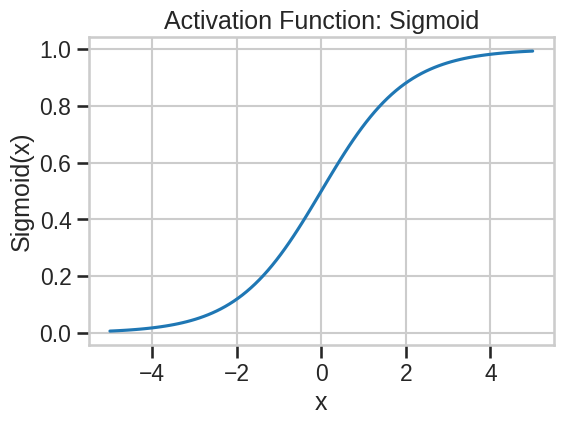

In [3]:
### Plotting Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plot_activation(sigmoid, 'Sigmoid')

The sigmoid function:

Takes any number (positive or negative)

Squeezes it into a value between 0 and 1

It looks like an S-shaped curve.

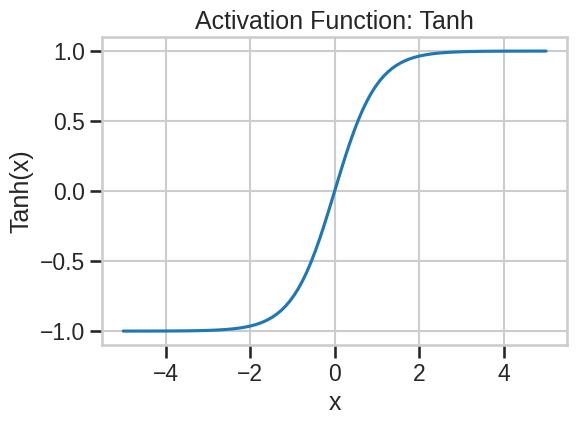

In [4]:
### Plotting Tanh activation function
def tanh(x):
    return np.tanh(x)

plot_activation(tanh, 'Tanh')

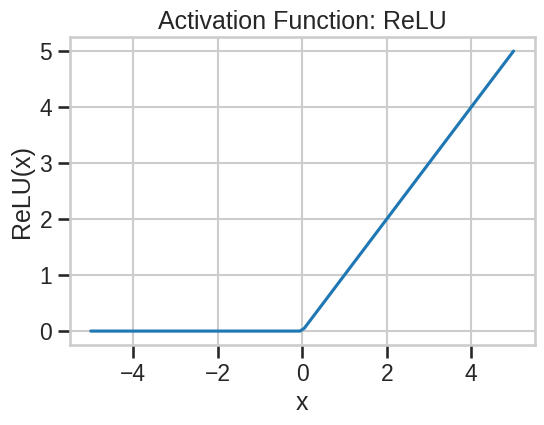

In [5]:
### Plotting ReLU activation function
def relu(x):
    return np.maximum(0, x)

plot_activation(relu, 'ReLU')

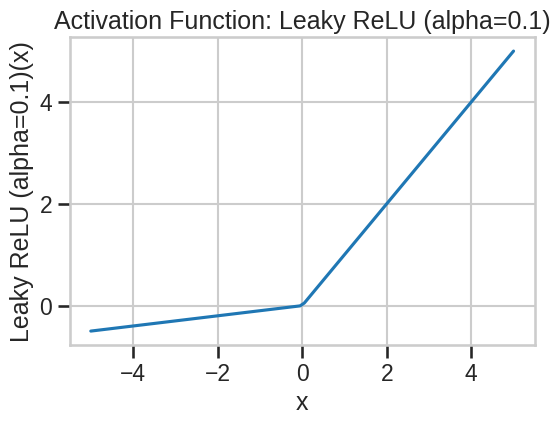

In [6]:
### Plotting Leaky ReLU activation function
def leaky_relu(x, alpha=0.1): # Keras default alpha for LeakyReLU layer is 0.3
    return np.where(x > 0, x, alpha * x)

plot_activation(lambda x: leaky_relu(x, alpha=0.1), 'Leaky ReLU (alpha=0.1)')

# **Simple Dense Neural Network - Data Preparation**

This code demonstrates the Softmax activation function and sets up a synthetic dataset for training a neural network.

We're not using plot_activation(func, name) to plot Softmax because this function is meant for simple activation functions like sigmoid or tanh, where you give one number and get one number back.

But Softmax works differently — it takes a list of numbers and gives back a list of probabilities that all add up to 1. You can't use it on single numbers by themselves, because Softmax needs to see all the scores at once to know how to divide them into probabilities.

The softmax function converts a vector of raw scores into probabilities that sum to 1, which is essential for multi-class classification. An example array [2.0, 1.0, 0.1] is passed through Softmax to show how it highlights the highest score while still assigning probabilities to others.


Then, a circular synthetic dataset is generated using make_circles, a useful test case for non-linear classification. The data is split into training and testing sets and standardized using StandardScaler, which ensures each feature has zero mean and unit variance—important for neural network convergence.

Finally, the training data is visualized using a scatter plot, with points colored by their class, helping to visualize the complex decision boundaries the model must learn.

Softmax input scores: [2.  1.  0.1]
Softmax output probabilities: [0.65900114 0.24243297 0.09856589]
Sum of Softmax probabilities: 1.0


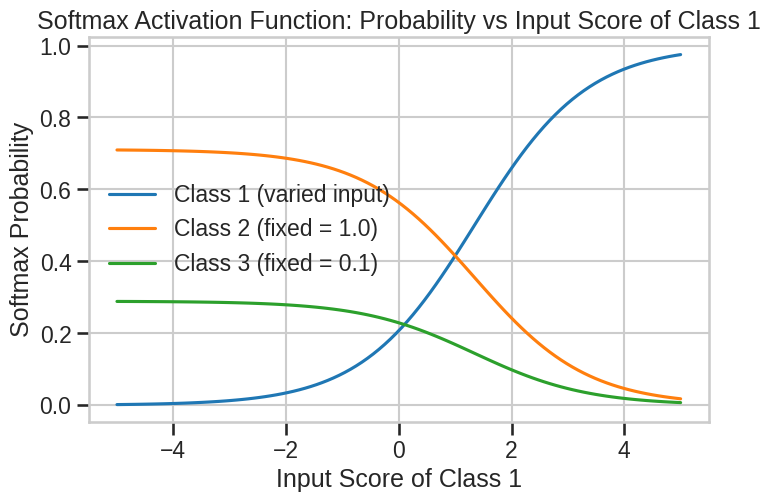

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Softmax function definition
def softmax(x_vector):
    # Subtracting max for numerical stability to avoid overflow
    e_x = np.exp(x_vector - np.max(x_vector))
    return e_x / e_x.sum(axis=0)

# Original input scores
scores = np.array([2.0, 1.0, 0.1])
probs = softmax(scores)

# Display softmax output
print("Softmax input scores:", scores)
print("Softmax output probabilities:", probs)
print("Sum of Softmax probabilities:", np.sum(probs))  # Should always be 1

# ----------- Softmax Activation Plot (Core Visualization) -----------

# To visualize how softmax behaves as an activation function, we vary **one input**
# (say, the score for Class 1), while keeping the other two fixed (Class 2 = 1.0, Class 3 = 0.1)
# This helps us see how the probability distribution shifts as one score changes

x_vals = np.linspace(-5, 5, 100)  # Varying input for Class 1 from -5 to 5

# For each x in x_vals, compute softmax([x, 1.0, 0.1])
# This gives us how the output probabilities change as Class 1's score increases
softmax_outputs = np.array([softmax([x, 1.0, 0.1]) for x in x_vals])

# Plotting the change in probabilities for each class
plt.figure(figsize=(8, 5))
plt.plot(x_vals, softmax_outputs[:, 0], label='Class 1 (varied input)')
plt.plot(x_vals, softmax_outputs[:, 1], label='Class 2 (fixed = 1.0)')
plt.plot(x_vals, softmax_outputs[:, 2], label='Class 3 (fixed = 0.1)')
plt.title('Softmax Activation Function: Probability vs Input Score of Class 1')
plt.xlabel('Input Score of Class 1')
plt.ylabel('Softmax Probability')
plt.legend()
plt.grid(True)
plt.show()


# **Why Scaling is Important**
Neural networks are sensitive to input scales. If one feature ranges from
[0,1] and another from [0,10,000], the larger feature can dominate the gradients, slowing or destabilizing training.

StandardScaler solves this by transforming each feature to have:

Mean = 0

Standard Deviation = 1

Example (income):
Let's say we have a list of incomes
Original:
[30,000, 50,000, 70,000]

**Formula for scaling**

x-scaled= x - mean/ std_dev

Mean = 50,000, Std Dev = 20,000

Scaled
=
[
30000-50000/20000, 50000 - 50000/20000, 70000-50000/20000
]
=[-1.0,0.0,+1.0]

After scaling, all features are centered and equally weighted — improving optimization stability and speed.

In [8]:
# Generate random samples
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for NNs)
# This ensures all input features are on a similar scale, which speeds up convergence
# Prevents the model from being biased toward features with larger numeric ranges

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

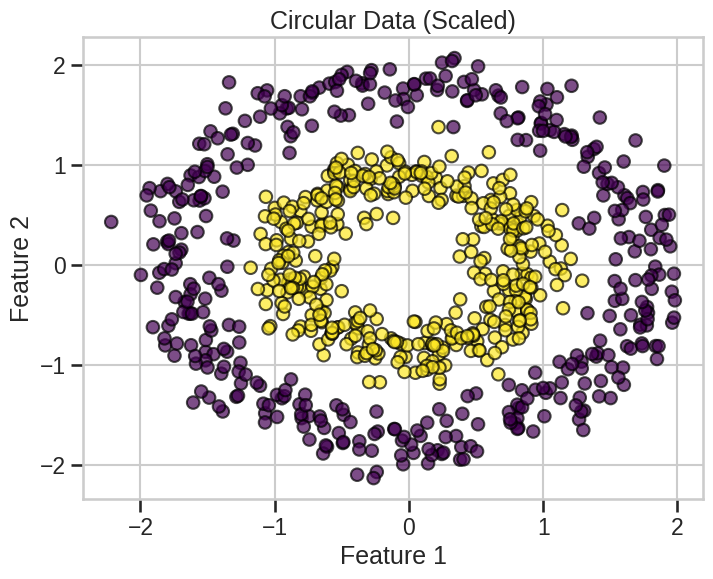

In [9]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('Circular Data (Scaled)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#**Model Definition (Keras Sequential API)**
We'll use the Keras Sequential API, which is a straightforward way to build models layer by layer.

The provided code defines a simple feedforward neural network using Keras’ Sequential model for binary classification tasks. It consists of an input layer that accepts two features (from the circular dataset), followed by two hidden layers: the first with 16 neurons and the second with 8 neurons, both using the ReLU activation function to introduce non-linearity.

The output layer has one neuron with a sigmoid activation function, which outputs a probability indicating the class (0 or 1).

This structure allows the model to learn complex decision boundaries. The model_dense.summary() function then displays a summary of the architecture, showing each layer’s output shape and the total number of trainable parameters.

In [10]:
model_dense = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)), # Hidden layer 1
    Dense(8, activation='relu'),                                        # Hidden layer 2
    Dense(1, activation='sigmoid')                                      # Output layer (binary classification)
])

# Display model summary
model_dense.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

#**Model Compilation**

Before training, we need to configure the learning process. This is done via the compile method, which requires:

**Optimizer**: Algorithm to update weights (e.g., 'adam', 'sgd', 'rmsprop'). 'Adam' is often a good default.

• Newton’s method is like hiking with a detailed 3-D map: because you know both the slope and the shape of the hill, you can make a few well-aimed, long strides straight down to the bottom.

• Stochastic gradient methods (SGD, Adam, RMSProp, etc.) take a lighter-weight approach: they peek at just a handful of training examples at a time and make many small, noisy moves, gradually steering the weights downhill. Adam is a widely used default because it adapts these steps automatically.

**Loss Function:** How the model measures its performance on the training data (e.g., 'binary_crossentropy' for binary classification). This is the score that optimizer tries to minimize.

**Metrics:** Used to monitor training and testing steps (e.g., 'accuracy').

This block of code compiles a neural network model using the Keras API. The model is configured with the Adam optimizer, which is an adaptive learning rate optimization algorithm commonly used for training deep learning models.

The loss function is set to 'binary_crossentropy', appropriate for binary classification tasks where the target output is 0 or 1.

Lastly, the model will track 'accuracy' as a metric during training and evaluation, giving insight into how often the model’s predictions match the true labels. This compilation step prepares the model for training.

In [11]:
model_dense.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# **Model Training**

This code trains the compiled neural network (model_dense) using the scaled training data. It runs for 50 epochs, updating weights in batches of 32 samples.

During training, 10% of the training data is set aside for validation to monitor performance on unseen data.

The verbose=1 setting provides a real-time progress bar showing the loss and accuracy per epoch.

The training history (including training and validation loss/accuracy for each epoch) is stored in the history_dense object, which can be used later for visualization or evaluation.

In [12]:
print("Training the dense model...")
history_dense = model_dense.fit(
    X_train_scaled,
    y_train,
    epochs=50,             # Number of times to iterate over the entire dataset
    batch_size=32,         # Number of samples per gradient update
    validation_split=0.1,  # Fraction of training data to use as validation data
    verbose=1              # 0 = silent, 1 = progress bar, 2 = one line per epoch
)
print("Dense model training complete.")

Training the dense model...
Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.5078 - loss: 0.7244 - val_accuracy: 0.5125 - val_loss: 0.7221
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4752 - loss: 0.7106 - val_accuracy: 0.4250 - val_loss: 0.7101
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5169 - loss: 0.7005 - val_accuracy: 0.4125 - val_loss: 0.7016
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4710 - loss: 0.6973 - val_accuracy: 0.4125 - val_loss: 0.6947
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4611 - loss: 0.6856 - val_accuracy: 0.4500 - val_loss: 0.6888
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4769 - loss: 0.6824 - val_accuracy: 0.4750 - val_loss: 0.6841
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4947 - loss: 0.6789 - val_accuracy: 0.5000 - val_loss: 0.6798
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4777 - loss: 0.6778 - val

# **Model Evaluation**

This code evaluates the performance of the trained dense neural network model on the test set, printing out the loss and accuracy.

It then visualizes the training history using a line plot, showing how the loss and accuracy changed over the 50 training epochs for both training and validation sets.

The plot helps you understand how well the model learned and whether it overfit or underfit the data.

In [13]:
# Evaluate on the test set
loss_dense, accuracy_dense = model_dense.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Loss: {loss_dense:.4f}")
print(f"Test Accuracy: {accuracy_dense:.4f}")


Test Loss: 0.0774
Test Accuracy: 0.9850


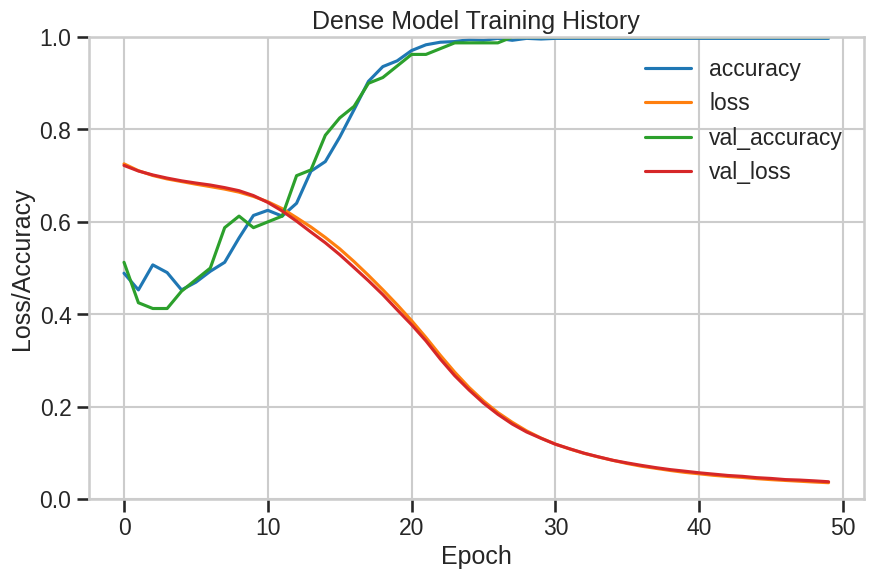

In [14]:
# Plot training history
import pandas as pd # Make sure pandas is imported if not already
pd.DataFrame(history_dense.history).plot(figsize=(10, 6))
plt.gca().set_ylim(0, 1) # Adjust y-axis if needed
plt.title('Dense Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.show()

# **Convolutional Neural Networks (CNNs or ConvNets)**
CNNs are a class of deep neural networks most commonly applied to analyzing visual imagery. They are also used for other types of data, such as audio, text (1D CNNs), and medical imaging.

Let's build a simple CNN to classify handwritten digits from the MNIST dataset.

### Part A: Manual Convolution by Hand

Before we jump into building the CNN, lets try to understand how convolution works.

We will do so by completing a convolution operation by hand on a small 3×3 image patch using a 3×3 filter.

**Image patch (3×3):**

10 20 30

20 30 40

30 40 50

**Filter / Kernel (3×3):**

-1 -1 -1

0 0 0

1 1 1


**Instructions:**
1. Multiply each element of the image patch with the corresponding value in the kernel.
2. Add all the results together.
3. This final number is the output of the convolution at that position.

Try computing it manually on paper, then we'll discuss the answer.



### But in a real image:

An image is usually larger than the filter — say a 5×5 image with a 3×3 filter.

The filter slides across the image (this is called striding), performing that same multiply-and-sum operation at each valid position.

The output is then a smaller matrix — often called a feature map — not just one value.

Let's look at an example for that



###  Example: Convolution with Striding

Let's take a **5×5 image** and a **3×3 filter (kernel)**. We'll apply the filter using a **stride of 1**, meaning the filter moves 1 step at a time horizontally and vertically.

#### Image (5×5):

1 2 3 0 1

0 1 2 3 0

1 2 1 0 2

0 1 0 1 3

2 1 2 1 0



####  Filter (3×3):

1 0 -1

1 0 -1

1 0 -1


####  How convolution works:

1. Place the 3×3 filter on the top-left 3×3 patch of the image.
2. Multiply corresponding elements and sum the result — this gives **one value**.
3. Slide the filter one step to the right and repeat.
4. Continue moving across the row, then go down by one row and repeat until the filter no longer fits.

####  Output Size (with stride = 1, no padding):

If input is **5×5**, filter is **3×3**, and stride is **1**, then:

Output height = (5 - 3) / 1 + 1 = 3

Output width = (5 - 3) / 1 + 1 = 3






### Example: Convolution with Stride = 1 (Top-Left Position)

We apply the filter to the top-left 3×3 region of the image:

#### Image Patch:
[1 2 3]

[0 1 2]

[1 2 1]

#### Filter:
[1 0 -1]

[1 0 -1]

[1 0 -1]


#### Multiplication:
[1×1 2×0 3×(-1)] → [1 0 -3]

[0×1 1×0 2×(-1)] → [0 0 -2]

[1×1 2×0 1×(-1)] → [1 0 -1]



#### Final Sum:
[1 + 0 + (-3)] + [0 + 0 + (-2)] + [1 + 0 + (-1)] = -4



 So the top-left cell in the output feature map is **-4**

---

Try to compute the rest of the 8 outputs in the feature map, we will discuss the answer together

### Part B: CNN on MNIST

This code loads the MNIST handwritten digits dataset, preprocesses the image and label data, and displays sample images.

First, it reshapes the grayscale images to include a channel dimension ((28, 28, 1)), then normalizes the pixel values from the original [0, 255] range to [0, 1] for better model performance.

The labels are also one-hot encoded so they can be used in multi-class classification. Finally, it visualizes the first 10 training images with their corresponding digit labels using Matplotlib. This step helps verify that the data was loaded and preprocessed correctly.

In [15]:
# Load MNIST dataset from Keras
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()
print("Original X_train_mnist shape:", X_train_mnist.shape)
print("Original y_train_mnist shape:", y_train_mnist.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original X_train_mnist shape: (60000, 28, 28)
Original y_train_mnist shape: (60000,)


# **What is channel?**
In image data:

Channels refer to color layers:

Grayscale images have 1 channel (intensity only)

RGB images have 3 channels (Red, Green, Blue)
Each image in the MNIST dataset is 28*28 pixels and grayscale.
So:

Original shape: (num_samples, 28, 28)

After reshaping: (num_samples, 28, 28, 1) — where 1 is the grayscale channel

This format is required for convolutional layers in most deep learning frameworks.

In [16]:
# Preprocess the data:
# CNNs expect input in the format (height, width, channels); here we add a channel dimension (1) for grayscale images.
# 1. Reshape images to include the channel dimension (1 for grayscale)
X_train_mnist = X_train_mnist.reshape(X_train_mnist.shape[0], 28, 28, 1).astype('float32')
X_test_mnist = X_test_mnist.reshape(X_test_mnist.shape[0], 28, 28, 1).astype('float32')
input_shape_mnist = (28, 28, 1)

# 2. Normalize pixel values from [0, 255] to [0, 1]
# Normalization here means converting raw pixel values to a common scale [0, 1] by dividing by 255.
# It is a form of scaling, but specifically refers to mapping data to a known range (not necessarily standardizing).

X_train_mnist /= 255.0
X_test_mnist /= 255.0

# 3. One-hot encode the labels (target variable)
num_classes = 10
y_train_mnist_cat = to_categorical(y_train_mnist, num_classes)
y_test_mnist_cat = to_categorical(y_test_mnist, num_classes)

print("\nProcessed X_train_mnist shape:", X_train_mnist.shape)
print("Processed y_train_mnist_cat shape:", y_train_mnist_cat.shape)


Processed X_train_mnist shape: (60000, 28, 28, 1)
Processed y_train_mnist_cat shape: (60000, 10)


In [ ]:
# Display a few example images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train_mnist[i].reshape(28,28), cmap='gray') # Use .squeeze() or .reshape(28,28)
    plt.title(f"Label: {y_train_mnist[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# **CNN model definition**

This code defines a Convolutional Neural Network (CNN) model using Keras' Sequential API for image classification on the MNIST dataset.

It consists of two convolutional blocks, each with a Conv2D layer (for extracting spatial features), a MaxPooling2D layer (for downsampling), and Dropout (to prevent overfitting).

After flattening the feature maps, a dense layer with 128 neurons applies further abstraction, followed by a final output layer with 10 units and softmax activation to classify digits 0–9.

The summary() function then prints the architecture and total number of parameters.

In [17]:
model_cnn = Sequential([
    # Convolutional Block 1
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape_mnist, padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25), # Adding dropout for regularization

    # Convolutional Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Flattening and Dense Layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') # Output layer for 10 classes
])

model_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

# **CNN Model Compilation**

The model_cnn.compile() function prepares the convolutional neural network (CNN) for training by specifying how the model should be optimized and evaluated. It uses the Adam optimizer, which is efficient and widely used due to its adaptive learning rate capabilities. The loss function is set to 'categorical_crossentropy', which is appropriate for multi-class classification tasks with one-hot encoded labels, such as the MNIST digit classification problem. Additionally, the model is configured to track accuracy as a performance metric during training and evaluation, helping to assess how well the model is learning to classify the input images.

In [ ]:
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy', # For one-hot encoded multi-class labels
                  metrics=['accuracy'])

# **CNN Model Training**

The provided code initiates the training of the CNN model on the MNIST dataset. It uses the fit() function, which takes in the training data (X_train_mnist and y_train_mnist_cat), and trains the model for 10 epochs with a batch size of 128. During training, 10% of the training data is used for validation, which helps monitor the model’s performance on unseen data after each epoch. The verbose=1 option enables progress output during training. If you're running this in Google Colab, switching to a GPU runtime can significantly speed up training. Once the training completes, it prints a confirmation message.

In [ ]:
print("Training the CNN model...")
# For faster training in Colab: Runtime -> Change runtime type -> Hardware accelerator -> GPU
history_cnn = model_cnn.fit(
    X_train_mnist,
    y_train_mnist_cat,
    epochs=10, # You can increase this for better accuracy (e.g., 15-20)
    batch_size=128,
    validation_split=0.1, # Use part of training data for validation during training
    verbose=1
)
print("CNN model training complete.")

# **CNN Model Evaluation**

This code evaluates the trained CNN model on the test dataset (X_test_mnist, y_test_mnist_cat) and prints the test loss and accuracy. The .evaluate() function computes these metrics without showing progress since verbose=0. It then visualizes the training history using a line plot generated from the history_cnn.history dictionary, which tracks accuracy and loss over each epoch for both training and validation data. This helps assess how well the model has learned and whether it's overfitting or underfitting.

In [ ]:
# Evaluate on the test set
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_mnist, y_test_mnist_cat, verbose=0)
print(f"\nCNN Test Loss: {loss_cnn:.4f}")
print(f"CNN Test Accuracy: {accuracy_cnn:.4f}")

In [ ]:
# Plot training history
import pandas as pd # Ensure pandas is imported
pd.DataFrame(history_cnn.history).plot(figsize=(10, 6))
plt.title('CNN Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.show()

# **CNN - Making Predictions and Visualizing Results**

This code visualizes the predictions made by the CNN model on the MNIST test set. It first uses model_cnn.predict() to generate probability scores for each digit (0–9), then uses np.argmax() to convert those scores into predicted digit labels. For the first 25 test images, it displays the image along with the true label and predicted label. The label is shown in green if the prediction is correct, and red if incorrect. This visual feedback helps quickly assess model performance and identify misclassified digits.

In [ ]:
# Make some predictions
predictions_cnn = model_cnn.predict(X_test_mnist)
predicted_classes_cnn = np.argmax(predictions_cnn, axis=1)

# Display some test images with their predicted labels
plt.figure(figsize=(12, 12))
num_images_to_show = 25
for i in range(num_images_to_show):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test_mnist[i].reshape(28,28), cmap='gray') # Use .squeeze() or .reshape(28,28)
    true_label = y_test_mnist[i]
    pred_label = predicted_classes_cnn[i]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()

# **Exercise: Build Your Own CNN on Fashion MNIST**

In this exercise, you’ll build a Convolutional Neural Network (CNN) to classify clothing items using the **Fashion MNIST** dataset.

This dataset contains 28x28 grayscale images of 10 types of clothing (e.g., shirts, sneakers, bags).

---

#### Your Task

1. **Load and explore** the Fashion MNIST dataset  
   *(Use `fashion_mnist.load_data()` from `tensorflow.keras.datasets`)*

2. **Preprocess** the data  
   - Normalize the pixel values  
   - Reshape the input for the CNN

3. **Build a CNN model**  
   - Use at least **2 convolutional layers**  
   - Add pooling layers and a fully connected layer  
   - Use softmax activation in the final output layer (10 classes)

4. **Train the model**  
   - Train it for 5 epochs  
   - Use a validation set to track performance

5. **Evaluate the model**  
   - Report the test accuracy  
   - Visualize sample predictions (optional)

---

### Reflection

- Which parts of the model made the biggest difference in accuracy?
- Were there any classes that your model struggled with?
- If you changed any architecture or hyperparameters, what happened?


In [ ]:
from tesnorflow.keras.datasets import fashion_mnist
#your code here..